In [1]:
# modelling
import pyro
import torch
pyro.set_rng_seed(0)

# lib
import sys
sys.path.append('..')

# set cwd one up
import os
os.chdir('..')

In [2]:
# find gpu if available, and name
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)
torch.set_default_dtype(torch.float64)

# show device info
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

cpu


Fitting background noise...
Background noise model:
Standard deviation: 11.553871266552218

Detrending and denoising cell data...


KeyboardInterrupt: 

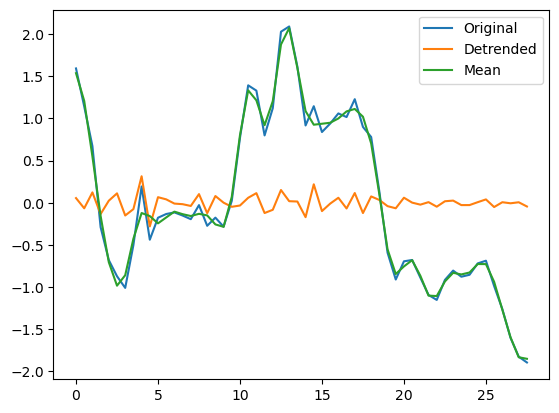

In [3]:
from pyrocell.core import OscillatorDetector

path = "data/hes/Hes1_example.csv"
osc = OscillatorDetector(path)

osc.fit_models(verbose=True)

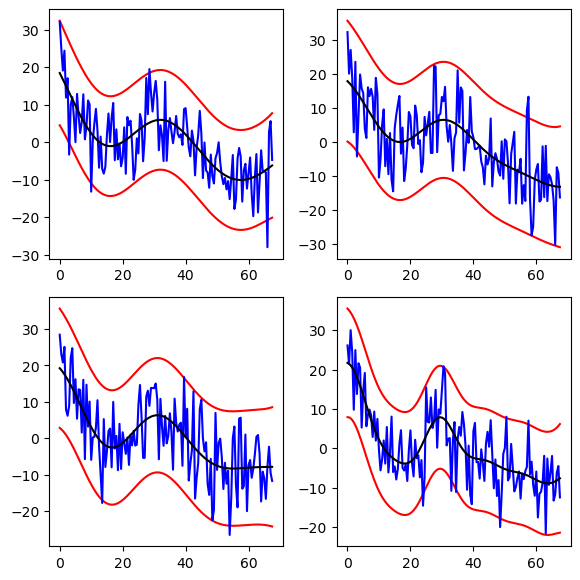

In [4]:
osc.plot("background")